In [1]:
%pylab inline
import os, sys, glob
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import trako as TKO
sys.path.append('MICCAI/')
import runner, sprinter
from prettytable import PrettyTable

In [3]:
DATA_FOLDER = '/home/d/Dropbox/Fan-test-ADHD/'
OUT_FOLDER = DATA_FOLDER
input = '111_reg_reg_outlier_removed_cluster_00007_orig.vtp'

In [7]:
config = {
    'name':'default'
}

compressed = input.replace('vtp','_'+config['name']+'.tko')
restored = input.replace('vtp','_'+config['name']+'_restored.vtp')
stats = runner.Runner.tko(DATA_FOLDER, input, 
                          compressed=os.path.join(OUT_FOLDER,compressed), 
                          restored=os.path.join(OUT_FOLDER,restored), config=config, force=True)

i_poly = TKO.Util.loadvtp(os.path.join(DATA_FOLDER, input))
i_scalars = i_poly['scalars']
i_nscalars = i_poly['scalar_names']
i_properties = i_poly['properties']
i_nproperties = i_poly['property_names']

r_poly = TKO.Util.loadvtp(os.path.join(OUT_FOLDER, restored))
r_scalars = r_poly['scalars']
r_properties = r_poly['properties']

for i,j in enumerate(i_nscalars):
    if j.startswith('RTOP'):
        print(i,j)
        stats = TKO.Util.error(i_scalars[i], r_scalars[i])
        print('min', stats[0][0])
        print('max', stats[0][1])
        print('mean', stats[0][2])
        print('std', stats[0][3])

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



2 RTOP1
min 0.0
max 6.1910105
mean 2.608333
std 1.5976366
3 RTOP2
min 0.0
max 0.002978325
mean 0.0014863791
std 0.0008586092


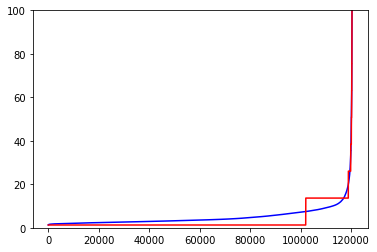

In [37]:
originalRTOP1 = np.sort(i_scalars[2])
restoredRTOP1 = np.sort(r_scalars[2])
ax = plt.gca()
ax.set_ylim(0,100)
plt.plot(originalRTOP1, color='blue')
plt.plot(restoredRTOP1, color='red')

In [ ]:
bitrates = [11,12,13,14,15,16,17,18,19,20]
for b in bitrates:
    config = {
        'name':str(b)+'bit',
        'RTOP1': {
            'position':False,
            'sequential':True,
            'quantization_bits': b,
            'compression_level':1,
            'quantization_range':-1,
            'quantization_origin':None
          }
    }

    compressed = input.replace('vtp','_'+config['name']+'.tko')
    restored = input.replace('vtp','_'+config['name']+'_restored.vtp')
    stats = runner.Runner.tko(DATA_FOLDER, input, 
                              compressed=os.path.join(OUT_FOLDER,compressed), 
                              restored=os.path.join(OUT_FOLDER,restored), config=config, verbose=False,force=True)

    i_poly = TKO.Util.loadvtp(os.path.join(DATA_FOLDER, input))
    i_scalars = i_poly['scalars']
    i_nscalars = i_poly['scalar_names']
    i_properties = i_poly['properties']
    i_nproperties = i_poly['property_names']

    r_poly = TKO.Util.loadvtp(os.path.join(OUT_FOLDER, restored))
    r_scalars = r_poly['scalars']
    r_properties = r_poly['properties']

    for i,j in enumerate(i_nscalars):
        if j.startswith('RTOP1'):
            print(i,j,'bitrate', b)
            stats = TKO.Util.error(i_scalars[i], r_scalars[i])
            print('min', stats[0][0])
            print('max', stats[0][1])
            print('mean', stats[0][2])
            print('std', stats[0][3])


    plt.figure()
    originalRTOP1 = np.sort(i_scalars[2])
    restoredRTOP1 = np.sort(r_scalars[2])
    ax = plt.gca()
    ax.set_ylim(0,100)
    plt.title('Subject 111, RTOP1, Encoded with Bitrate '+str(b))
    plt.plot(originalRTOP1, color='blue')
    plt.plot(restoredRTOP1, color='red')

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



2 RTOP1 bitrate 11
min 0.0
max 49.542862
mean 3.6128905
std 4.1455026


/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



2 RTOP1 bitrate 12
min 0.0
max 24.762447
mean 3.468589
std 3.3259346


/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



2 RTOP1 bitrate 13
min 0.0
max 12.381079
mean 3.2194397
std 2.5608344


/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



2 RTOP1 bitrate 14
min 0.0
max 6.1910105
mean 2.608333
std 1.5976366


/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



2 RTOP1 bitrate 15
min 0.0
max 3.0954099
mean 1.6187081
std 0.7803165


/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



2 RTOP1 bitrate 16
